<a href="https://colab.research.google.com/github/p6dropaulo/Challenge-Analise-De-Vendas-Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import numpy as np

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#**1. Análise do faturamento**




In [23]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58


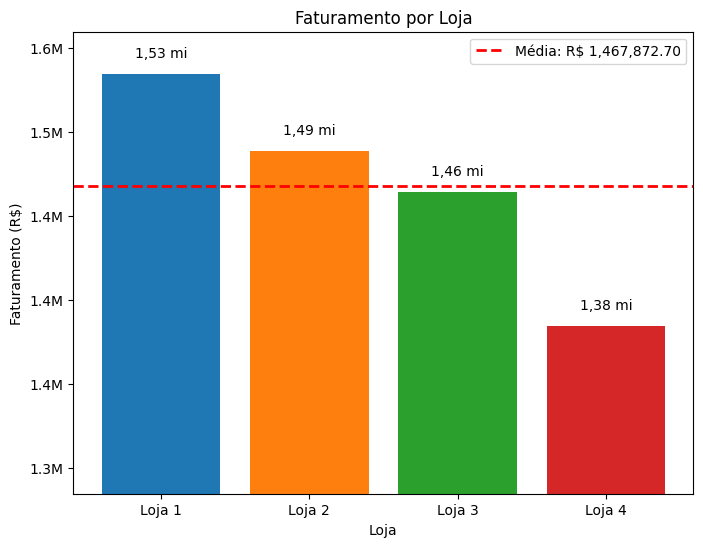

In [24]:
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8, 6))

def formatar_em_milhoes(x, pos):
    return f'{x/1_000_000:.1f}M'

plt.bar(lojas, faturamentos, color=cores)
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.ylim(min(faturamentos) - 100000, max(faturamentos) + 25000)

media = sum(faturamentos) / len(faturamentos)
plt.axhline(y=media, color='red', linestyle='--', linewidth=2, label=f'Média: R$ {media:,.2f}')

for i, valor in enumerate(faturamentos):
    texto_formatado = f'{valor / 1_000_000:.2f}'.replace('.', ',') + ' mi'
    plt.text(i, valor + 10000, texto_formatado, ha='center')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(formatar_em_milhoes))
plt.legend()

plt.show()

In [25]:
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4

participacao_loja1 = (faturamento_loja1 / faturamento_total) * 100
participacao_loja2 = (faturamento_loja2 / faturamento_total) * 100
participacao_loja3 = (faturamento_loja3 / faturamento_total) * 100
participacao_loja4 = (faturamento_loja4 / faturamento_total) * 100

print(f"Participação Loja 1 no faturamento total: {participacao_loja1:.2f}%")
print(f"Participação Loja 2 no faturamento total: {participacao_loja2:.2f}%")
print(f"Participação Loja 3 no faturamento total: {participacao_loja3:.2f}%")
print(f"Participação Loja 4 no faturamento total: {participacao_loja4:.2f}%")


Participação Loja 1 no faturamento total: 26.13%
Participação Loja 2 no faturamento total: 25.35%
Participação Loja 3 no faturamento total: 24.93%
Participação Loja 4 no faturamento total: 23.58%


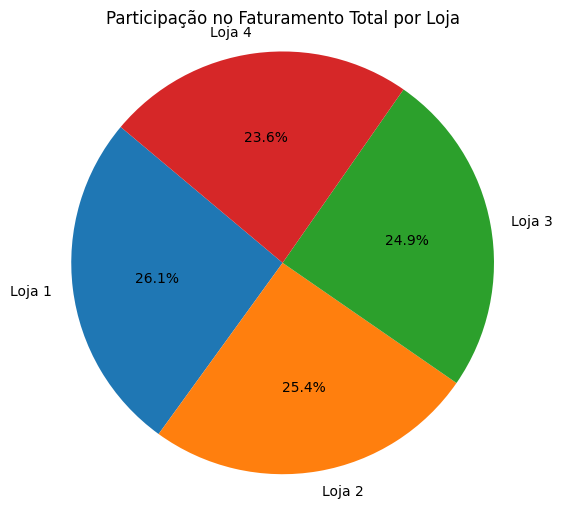

In [26]:
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Participação no Faturamento Total por Loja')
plt.axis('equal')

plt.show()


# **2. Vendas por Categoria**


In [27]:
vendas_categoria_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
vendas_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
vendas_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
vendas_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

print("Loja 1 - Vendas por Categoria:")
print(vendas_categoria_loja1)
print("\nLoja 2 - Vendas por Categoria:")
print(vendas_categoria_loja2)
print("\nLoja 3 - Vendas por Categoria:")
print(vendas_categoria_loja3)
print("\nLoja 4 - Vendas por Categoria:")
print(vendas_categoria_loja4)


Loja 1 - Vendas por Categoria:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Loja 2 - Vendas por Categoria:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Loja 3 - Vendas por Categoria:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis          

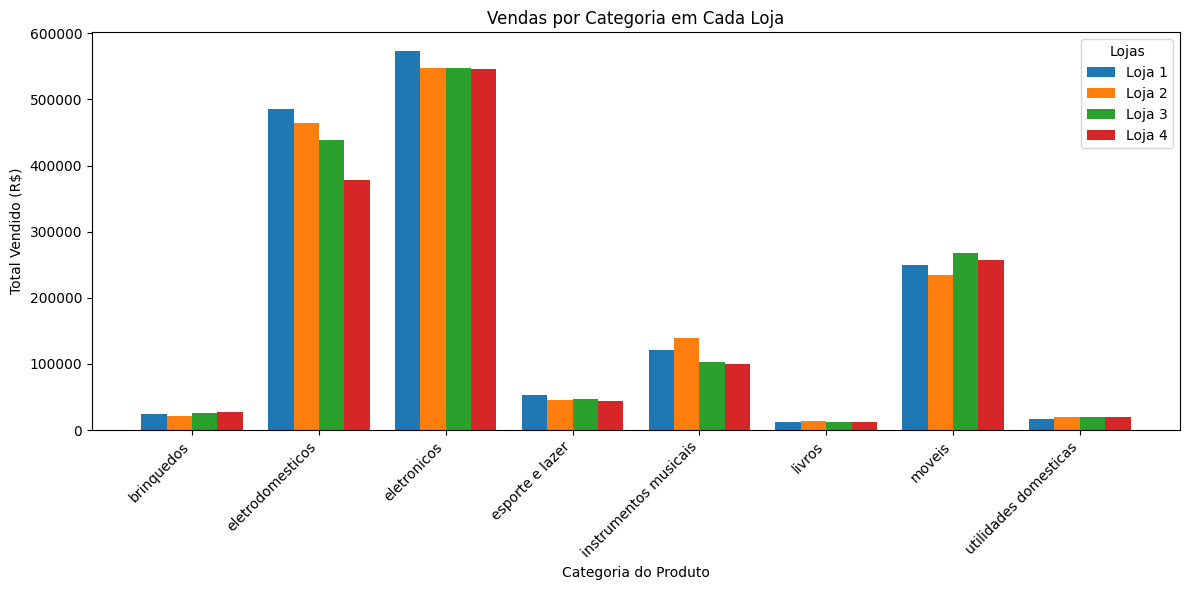

In [28]:
df_vendas_cat = pd.DataFrame({
    'Loja 1': vendas_categoria_loja1,
    'Loja 2': vendas_categoria_loja2,
    'Loja 3': vendas_categoria_loja3,
    'Loja 4': vendas_categoria_loja4
})

categorias = df_vendas_cat.index
n_categorias = len(categorias)
n_lojas = len(df_vendas_cat.columns)

x = np.arange(n_categorias)
largura = 0.2

plt.figure(figsize=(12, 6))

for i, loja in enumerate(df_vendas_cat.columns):
    plt.bar(x + i * largura, df_vendas_cat[loja], width=largura, label=loja)

plt.xticks(x + largura * (n_lojas - 1) / 2, categorias, rotation=45, ha='right')

plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Total Vendido (R$)')
plt.legend(title='Lojas')

plt.tight_layout()
plt.show()

# **3. Média de Avaliação das Lojas**

In [29]:
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()


print(f"Média de avaliação da loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de avaliação da loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de avaliação da loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de avaliação da loja 4: {media_avaliacao_loja4:.2f}")

Média de avaliação da loja 1: 3.98
Média de avaliação da loja 2: 4.04
Média de avaliação da loja 3: 4.05
Média de avaliação da loja 4: 4.00


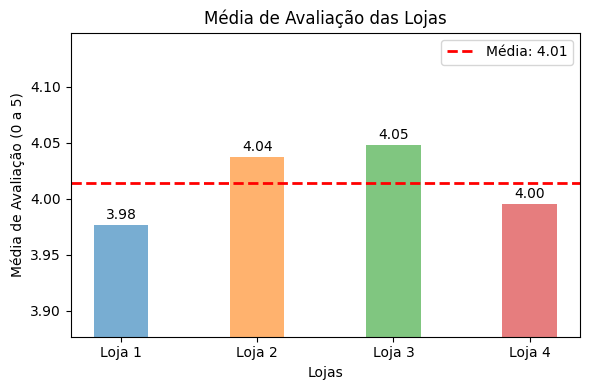

In [30]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [
    media_avaliacao_loja1,
    media_avaliacao_loja2,
    media_avaliacao_loja3,
    media_avaliacao_loja4
]

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(6, 4))

plt.bar(lojas, avaliacoes, color=cores, alpha=0.6, width=0.4)

plt.title('Média de Avaliação das Lojas')
plt.ylabel('Média de Avaliação (0 a 5)')
plt.xlabel('Lojas')
plt.ylim(min(avaliacoes) - 0.1, max(avaliacoes) + 0.1)

media_avaliacoes = sum(avaliacoes) / len(avaliacoes)
plt.axhline(y=media_avaliacoes, color='red', linestyle='--', linewidth=2, label=f'Média: {media_avaliacoes:.2f}')

for i, nota in enumerate(avaliacoes):
    plt.text(i, nota + 0.005, f'{nota:.2f}', ha='center')

plt.legend()
plt.tight_layout()
plt.show()


# **4. Produtos Mais e Menos Vendidos**

In [31]:
def exibir_top_produtos(vendas_por_produto, nome_loja):
    print(f"\n{nome_loja} - Top 3 Produtos Mais Vendidos:")
    top_mais = vendas_por_produto.head(3)
    for produto, qtd in top_mais.items():
        print(f"Produto: {produto} | Quantidade vendida: {qtd}")

    print(f"\n{nome_loja} - Top 3 Produtos Menos Vendidos:")
    top_menos = vendas_por_produto.tail(3)
    for produto, qtd in top_menos.items():
        print(f"Produto: {produto} | Quantidade vendida: {qtd}")

vendas_por_produto_loja1 = loja1['Produto'].value_counts()
exibir_top_produtos(vendas_por_produto_loja1, "Loja 1")

vendas_por_produto_loja2 = loja2['Produto'].value_counts()
exibir_top_produtos(vendas_por_produto_loja2, "Loja 2")

vendas_por_produto_loja3 = loja3['Produto'].value_counts()
exibir_top_produtos(vendas_por_produto_loja3, "Loja 3")

vendas_por_produto_loja4 = loja4['Produto'].value_counts()
exibir_top_produtos(vendas_por_produto_loja4, "Loja 4")



Loja 1 - Top 3 Produtos Mais Vendidos:
Produto: Micro-ondas | Quantidade vendida: 60
Produto: TV Led UHD 4K | Quantidade vendida: 60
Produto: Guarda roupas | Quantidade vendida: 60

Loja 1 - Top 3 Produtos Menos Vendidos:
Produto: Panela de pressão | Quantidade vendida: 35
Produto: Headset | Quantidade vendida: 33
Produto: Celular ABXY | Quantidade vendida: 33

Loja 2 - Top 3 Produtos Mais Vendidos:
Produto: Iniciando em programação | Quantidade vendida: 65
Produto: Micro-ondas | Quantidade vendida: 62
Produto: Bateria | Quantidade vendida: 61

Loja 2 - Top 3 Produtos Menos Vendidos:
Produto: Mesa de jantar | Quantidade vendida: 34
Produto: Impressora | Quantidade vendida: 34
Produto: Jogo de tabuleiro | Quantidade vendida: 32

Loja 3 - Top 3 Produtos Mais Vendidos:
Produto: Kit banquetas | Quantidade vendida: 57
Produto: Mesa de jantar | Quantidade vendida: 56
Produto: Cama king | Quantidade vendida: 56

Loja 3 - Top 3 Produtos Menos Vendidos:
Produto: Mochila | Quantidade vendida: 3

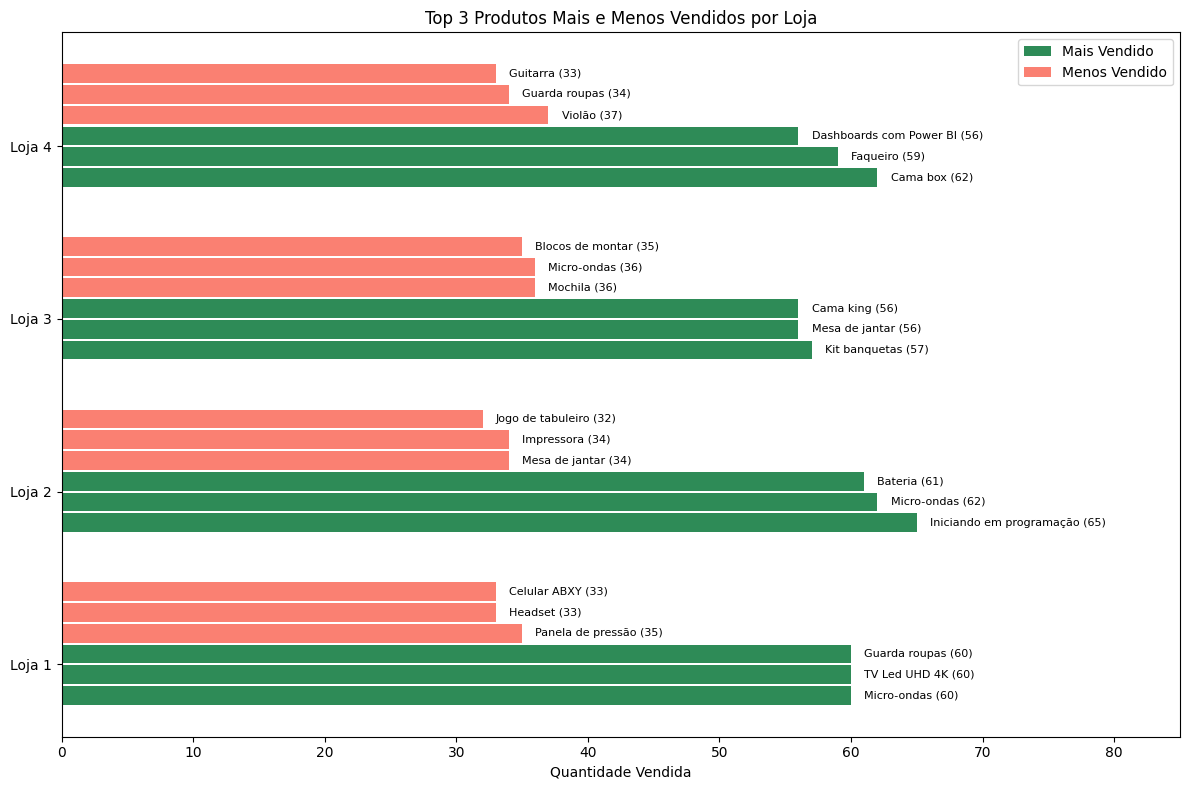

In [32]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
top_mais_vendidos = {
    'Loja 1': list(vendas_por_produto_loja1.head(3).items()),
    'Loja 2': list(vendas_por_produto_loja2.head(3).items()),
    'Loja 3': list(vendas_por_produto_loja3.head(3).items()),
    'Loja 4': list(vendas_por_produto_loja4.head(3).items()),
}

top_menos_vendidos = {
    'Loja 1': list(vendas_por_produto_loja1.tail(3).items()),
    'Loja 2': list(vendas_por_produto_loja2.tail(3).items()),
    'Loja 3': list(vendas_por_produto_loja3.tail(3).items()),
    'Loja 4': list(vendas_por_produto_loja4.tail(3).items()),
}


altura = 0.35
espacamento = 0.12
cores_mais = ['seagreen'] * 3
cores_menos = ['salmon'] * 3

fig, ax = plt.subplots(figsize=(12, 8))
y_base = np.arange(len(lojas))

for i, loja in enumerate(lojas):
    # Posição base para cada barra da loja i
    for j in range(3):
        # Mais vendidos
        produto, qtd = top_mais_vendidos[loja][j]
        y_pos = y_base[i] + (j - 1.5) * espacamento
        ax.barh(y_pos, qtd, height=espacamento * 0.9, color=cores_mais[j], label='Mais Vendido' if i == 0 and j == 0 else "")
        ax.text(qtd + 1, y_pos, f'{produto} ({qtd})', va='center', fontsize=8)

        # Menos vendidos
        produto, qtd = top_menos_vendidos[loja][j]
        y_pos = y_base[i] + (j + 1.5) * espacamento
        ax.barh(y_pos, qtd, height=espacamento * 0.9, color=cores_menos[j], label='Menos Vendido' if i == 0 and j == 0 else "")
        ax.text(qtd + 1, y_pos, f'{produto} ({qtd})', va='center', fontsize=8)

ax.set_yticks(y_base)
ax.set_yticklabels(lojas)
ax.set_xlabel('Quantidade Vendida')
ax.set_title('Top 3 Produtos Mais e Menos Vendidos por Loja')
ax.set_xlim(0, max(max(q for _, q in sum(top_mais_vendidos.values(), [])), max(q for _, q in sum(top_menos_vendidos.values(), []))) + 20)
ax.legend()
plt.tight_layout()
plt.show()


# **5. Frete Médio por Loja**


In [33]:
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print(f"Frete médio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio - Loja 4: R$ {frete_medio_loja4:.2f}")

Frete médio - Loja 1: R$ 34.69
Frete médio - Loja 2: R$ 33.62
Frete médio - Loja 3: R$ 33.07
Frete médio - Loja 4: R$ 31.28


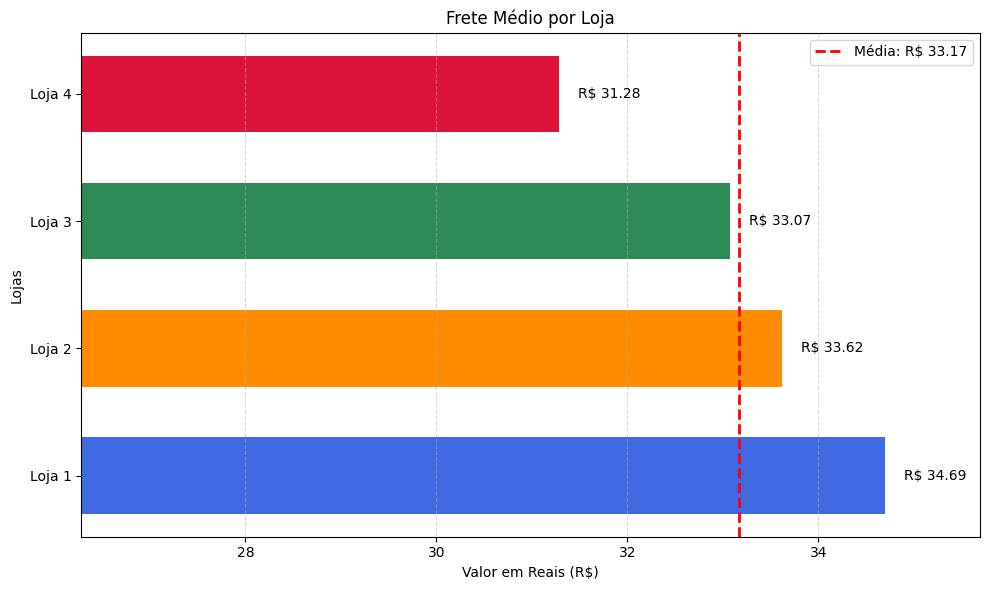

In [34]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

plt.figure(figsize=(10, 6))
bar_height = 0.6
barras = plt.barh(lojas, fretes, height=bar_height, color=['royalblue', 'darkorange', 'seagreen', 'crimson'])

for barra in barras:
    x = barra.get_width()
    plt.text(x + 0.2, barra.get_y() + barra.get_height() / 2, f'R$ {x:.2f}', va='center')

plt.title('Frete Médio por Loja')
plt.xlabel('Valor em Reais (R$)')
plt.ylabel('Lojas')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, max(fretes) * 1.2)
plt.xlim(min(fretes) - 5, max(fretes) + 1)

media_fretes = sum(fretes) / len(fretes)
plt.axvline(x=media_fretes, color='red', linestyle='--', linewidth=2, label=f'Média: R$ {media_fretes:.2f}')

plt.legend()
plt.tight_layout()
plt.show()


# **6. Relatório de Análise de Desempenho das Lojas**


###**Introdução**

Este relatório tem como objetivo identificar, com base em dados objetivos, qual das quatro lojas analisadas apresenta o menor desempenho e eficiência. A decisão visa apoiar o senhor João na escolha da loja que deverá ser vendida. Foram considerados os seguintes fatores para a análise: faturamento total, participação no faturamento total, vendas por categoria de produto, avaliação média dos clientes, produtos mais e menos vendidos e custo médio do frete por loja.



###**Desenvolvimento**

####**1. Faturamento Total e Participação no faturamento**

| Loja   | Faturamento (R$) | Participação no Total (%) |
| ------ | ---------------- | ------------------------- |
| Loja 1 | 1.534.509,12     | 26,1%                     |
| Loja 2 | 1.488.459,06     | 25,4%                     |
| Loja 3 | 1.464.025,03     | 24,9%                     |
| Loja 4 | 1.384.497,58     | 23,6%                     |

<img src="/content/FATURAMENTO.png" width="500">

A Loja 4 apresenta o menor faturamento absoluto e também a menor participação percentual no faturamento total. Isso evidencia sua menor relevância dentro do conjunto de lojas da empresa.

---

####**2. Avaliação Média dos Clientes**

| Loja   | Avaliação Média |
| ------ | --------------- |
| Loja 1 | 3.98            |
| Loja 2 | 4.04            |
| Loja 3 | 4.05            |
| Loja 4 | 4.00            |  

Apesar de estar tecnicamente dentro da média, a Loja 4 tem a segunda menor avaliação, atrás apenas da Loja 1. A Loja 3 possui o melhor desempenho nesse aspecto.

<img src="/content/AVALIACAO.png" width="500">

---

####**3. Frete Médio**

| Loja   | Frete Médio (R$) |
| ------ | ---------------- |
| Loja 1 | 34,69            |
| Loja 2 | 33,62            |
| Loja 3 | 33,07            |
| Loja 4 | 31,28            |

A Loja 4 tem o menor custo de frete, o que representa um ponto positivo. No entanto, essa vantagem isolada não compensa os demais indicadores negativos.

<img src="/content/FRETE.png" width="500">

---

####**4. Análise por Categoria de Produto**

Em todas as lojas, os principais responsáveis pelo faturamento são as categorias **“Eletrodomésticos”, “Eletrônicos” e “Móveis”**. Essas categorias são responsáveis por mais de 70% do faturamento das lojas, com destaque para os eletrônicos, especialmente na Loja 1. A Loja 4 tem os menores valores em todas essas categorias-chave, o que contribui diretamente para seu menor faturamento geral.  

Além disso, em categorias secundárias como “Instrumentos Musicais” e “Esporte e Lazer”, a Loja 4 também possui desempenho inferior.

<img src="/content/CATEGORIA.png" width="500">

---

####**5. Produtos Mais e Menos Vendidos**

* A **Loja 1** possui um bom equilíbrio entre itens vendidos, com produtos de alto valor como TVs e micro-ondas entre os mais vendidos.

* A **Loja 2** apresenta bom desempenho em livros e eletrônicos.

* A **Loja 3** se destaca com móveis entre os mais vendidos, mas apresenta baixa venda de itens mais acessíveis.

* A **Loja 4** mistura produtos de valor médio com bom desempenho, mas alguns itens relevantes como “Guarda roupas” e “Guitarra” estão entre os menos vendidos.

<img src="/content/MAIS_MENOS_VENDIDOS.png" width="500">

A Loja 4 apresenta volume de vendas competitivo em seus produtos mais vendidos. No entanto, o número absoluto de unidades dos produtos menos vendidos é semelhante ao das demais lojas, indicando um padrão de baixa rotatividade para certos itens.  

O destaque positivo é a venda de produtos como “Cama box” e “Dashboards com Power BI”, mas esses não são suficientes para compensar o fraco desempenho geral da loja.


---


###**Conclusão**

A Loja 4 apresenta o menor faturamento entre as quatro unidades, totalizando R$ 1.384.497,58, o que representa apenas 23,6% da participação no faturamento total. Além disso, embora ela compartilhe a liderança nas categorias de maior venda (eletrônicos e eletrodomésticos), seu volume de vendas nessas categorias ainda é inferior ao das demais lojas, o que demonstra menor competitividade.

---

| Indicador             |Loja 1      |Loja 2      | Loja 3     | Loja 4     |
| --------------------- |:-----------|:------     |:------     |:------     |
| Faturamento (R$)      |1.534.509,12|1.488.459,06|1.464.025,03|1.384.497,58|
| Categoria mais vendida|Eletrônicos |Eletrônicos |Eletrônicos |Eletrônicos |
| Avaliação média       |3,98        |4,04        |4,05        |4,00        |
| Produto mais vendido  |Micro-ondas |Iniciando Em Programação |Kit Banqueta|Cama box|
| Produto menos vendido |Headset     |Jogo de tabuleiro|Blocos de montar |Guitarra|
| Frete Médio           |34.99       |33.62       |33.07       |31.28       |

---

O único aspecto onde a Loja 4 se destaca positivamente é no frete médio, que é o mais barato entre todas as lojas (R$ 31,28). No entanto, esse diferencial de custo logístico não é suficiente para compensar os pontos fracos em desempenho comercial e percepção do cliente.

Portanto, com base na análise quantitativa e qualitativa dos dados, recomenda-se a venda da Loja 4. Trata-se da unidade com menor impacto financeiro, desempenho comercial mais fraco e competitividade limitada, e que, mesmo com custo logístico reduzido, não demonstra sinais de potencial para reverter esse cenário em curto ou médio prazo.